<a href="https://colab.research.google.com/github/sengupta-arijit-rij/Machine-Learning/blob/main/Sprint1_MG_Arijit_Sengupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pre-Requisites

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1:

In [2]:
#  Load and print the cell phone data.
cell_phones_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/cell_phones.csv'
cell_phones=pd.read_csv(cell_phones_url)
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Task 2:

In [3]:
# Load and print the population data.
population_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/population.csv'
population=pd.read_csv(population_url)
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


Task 3:

In [4]:
#  Load and print the geo country codes data.
geo_codes_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/geo_country_codes.csv'
geo_codes=pd.read_csv(geo_codes_url)
geo_codes.head()

,geo,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,longitude,main_religion_2008,country,un_sdg_ldc,un_sdg_region,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,...,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,...,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,True,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,...,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,True,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,...,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AI,americas,america


Task 4:

In [5]:
# check for missing values in each of these DataFrames: cell_phones, population and geo_codes
cell_phones_missing=cell_phones.isnull().sum().sum()
population_missing=population.isnull().sum().sum()
geo_codes_missing=geo_codes.isnull().sum().sum()

print(cell_phones_missing)
print(population_missing)
print(geo_codes_missing)

0
0
781


Task 5:

In [39]:
# Merge the cell_phones and population dataframes with an inner merge on geo and time
cell_phone_population=pd.merge(cell_phones,population,on=['geo','time'], how='inner')
cell_phone_population.tail()

,geo,time,cell_phones_total,population_total
8925,zwe,2015,12757410.0,13814642
8926,zwe,2016,12878926.0,14030338
8927,zwe,2017,14092104.0,14236599
8928,zwe,2018,12908992.0,14438812
8929,zwe,2019,13195902.0,14645473


Task 6:

In [7]:
# Merge the cell_phone_population and geo_codes DataFrames with an inner merge on geo

geo_cell_phone_population=pd.merge(cell_phone_population,geo_codes[['country','geo']],on=['geo'], how='inner')
# geo_cell_phone_population['time'].tail(30)
geo_cell_phone_population.head()
# print(geo_cell_phone_population['country'].unique())


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996967,Afghanistan
1,afg,1965,0.0,9956318,Afghanistan
2,afg,1970,0.0,11173654,Afghanistan
3,afg,1975,0.0,12689164,Afghanistan
4,afg,1976,0.0,12943093,Afghanistan


Task 7:

In [8]:
# cell_phones_total and population_total columns to calculate the number of cell phones per person for each country and year.
geo_cell_phone_population['cell_phones_per_person']=geo_cell_phone_population['cell_phones_total']/geo_cell_phone_population['population_total']
geo_cell_phone_population.head(200)

# geo_cell_phone_population.groupby(['cell_phones_total','population_total','country','time']).sum()




,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
0,afg,1960,0.0,8996967,Afghanistan,0.000000
1,afg,1965,0.0,9956318,Afghanistan,0.000000
2,afg,1970,0.0,11173654,Afghanistan,0.000000
3,afg,1975,0.0,12689164,Afghanistan,0.000000
4,afg,1976,0.0,12943093,Afghanistan,0.000000
...,...,...,...,...,...,...
195,are,1985,7924.0,1366165,United Arab Emirates,0.005800
196,are,1986,11191.0,1446386,United Arab Emirates,0.007737
197,are,1987,13711.0,1533526,United Arab Emirates,0.008941
198,are,1988,13823.0,1627068,United Arab Emirates,0.008496


Task 8:

In [44]:
# Identify the number of cell phones per person in the US in 2017
# US_2017=geo_cell_phone_population.query('time == "2019"' and 'country == "Zimbabwe"')[['country','cell_phones_total','time']]

US_2017 = geo_cell_phone_population[(geo_cell_phone_population['country']=="United States") & (geo_cell_phone_population["time"]==2007)]
# mask = (geo_cell_phone_population["country"]=="United States") & (geo_cell_phone_population["time"]==2007)
# US_2017 = geo_cell_phone_population.loc[mask, ["country","time","cell_phones_total"]]



US_2017.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8445,usa,2007,249300000.0,300608425,United States,0.829318


Task 9:

In [12]:
from numpy import number
# Describe the numeric variables in geo_cell_phone_population
geo_cell_phone_population.describe(include=number)
mean_phones=geo_cell_phone_population['cell_phones_total'].mean()
mean_phones

10295264.616126541

Task 10:

In [45]:
# Describe the categorical variables in geo_cell_phone_population
geo_cell_phone_population.describe(exclude=number)
# geo_cell_phone_population['country'].unique()
# unique_country=len(geo_cell_phone_population['country'].unique())
unique_country=geo_cell_phone_population['country'].nunique()
print(unique_country)

195

Task 11:

In [47]:
# Create a new dataframe called df2017 that includes only records from geo_cell_phone_population that ocurred in 2017.
# mask = (geo_cell_phone_population["time"]==2017)
# df2017=geo_cell_phone_population.loc[mask, ["country","time","cell_phones_total","geo","population_total","cell_phones_per_person"]]
df2017=geo_cell_phone_population[geo_cell_phone_population['time']==2017]
df2017.head(20)

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
45,afg,2017,23929713.0,36296111,Afghanistan,0.659291
93,ago,2017,13323952.0,29816769,Angola,0.446861
141,alb,2017,3625699.0,2884169,Albania,1.257104
189,and,2017,80337.0,76997,Andorra,1.043378
227,are,2017,19826224.0,9487206,United Arab Emirates,2.089785
275,arg,2017,61897379.0,43937143,Argentina,1.408771
323,arm,2017,3488524.0,2944789,Armenia,1.184643
365,atg,2017,184000.0,95425,Antigua and Barbuda,1.928216
411,aus,2017,26660000.0,24584619,Australia,1.084418
459,aut,2017,10859000.0,8819902,Austria,1.231193


Task 12:

In [49]:
# Identify the five countries with the most cell phones per person in 2017
df2017.sort_values(by=['cell_phones_per_person'], ascending=False).head()


,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
3448,hkg,2017,18394762.0,7306315,"Hong Kong, China",2.517652
227,are,2017,19826224.0,9487206,United Arab Emirates,2.089785
365,atg,2017,184000.0,95425,Antigua and Barbuda,1.928216
5253,mdv,2017,900120.0,496398,Maldives,1.813303
1937,cri,2017,8840342.0,4949955,Costa Rica,1.785944


Task 13:

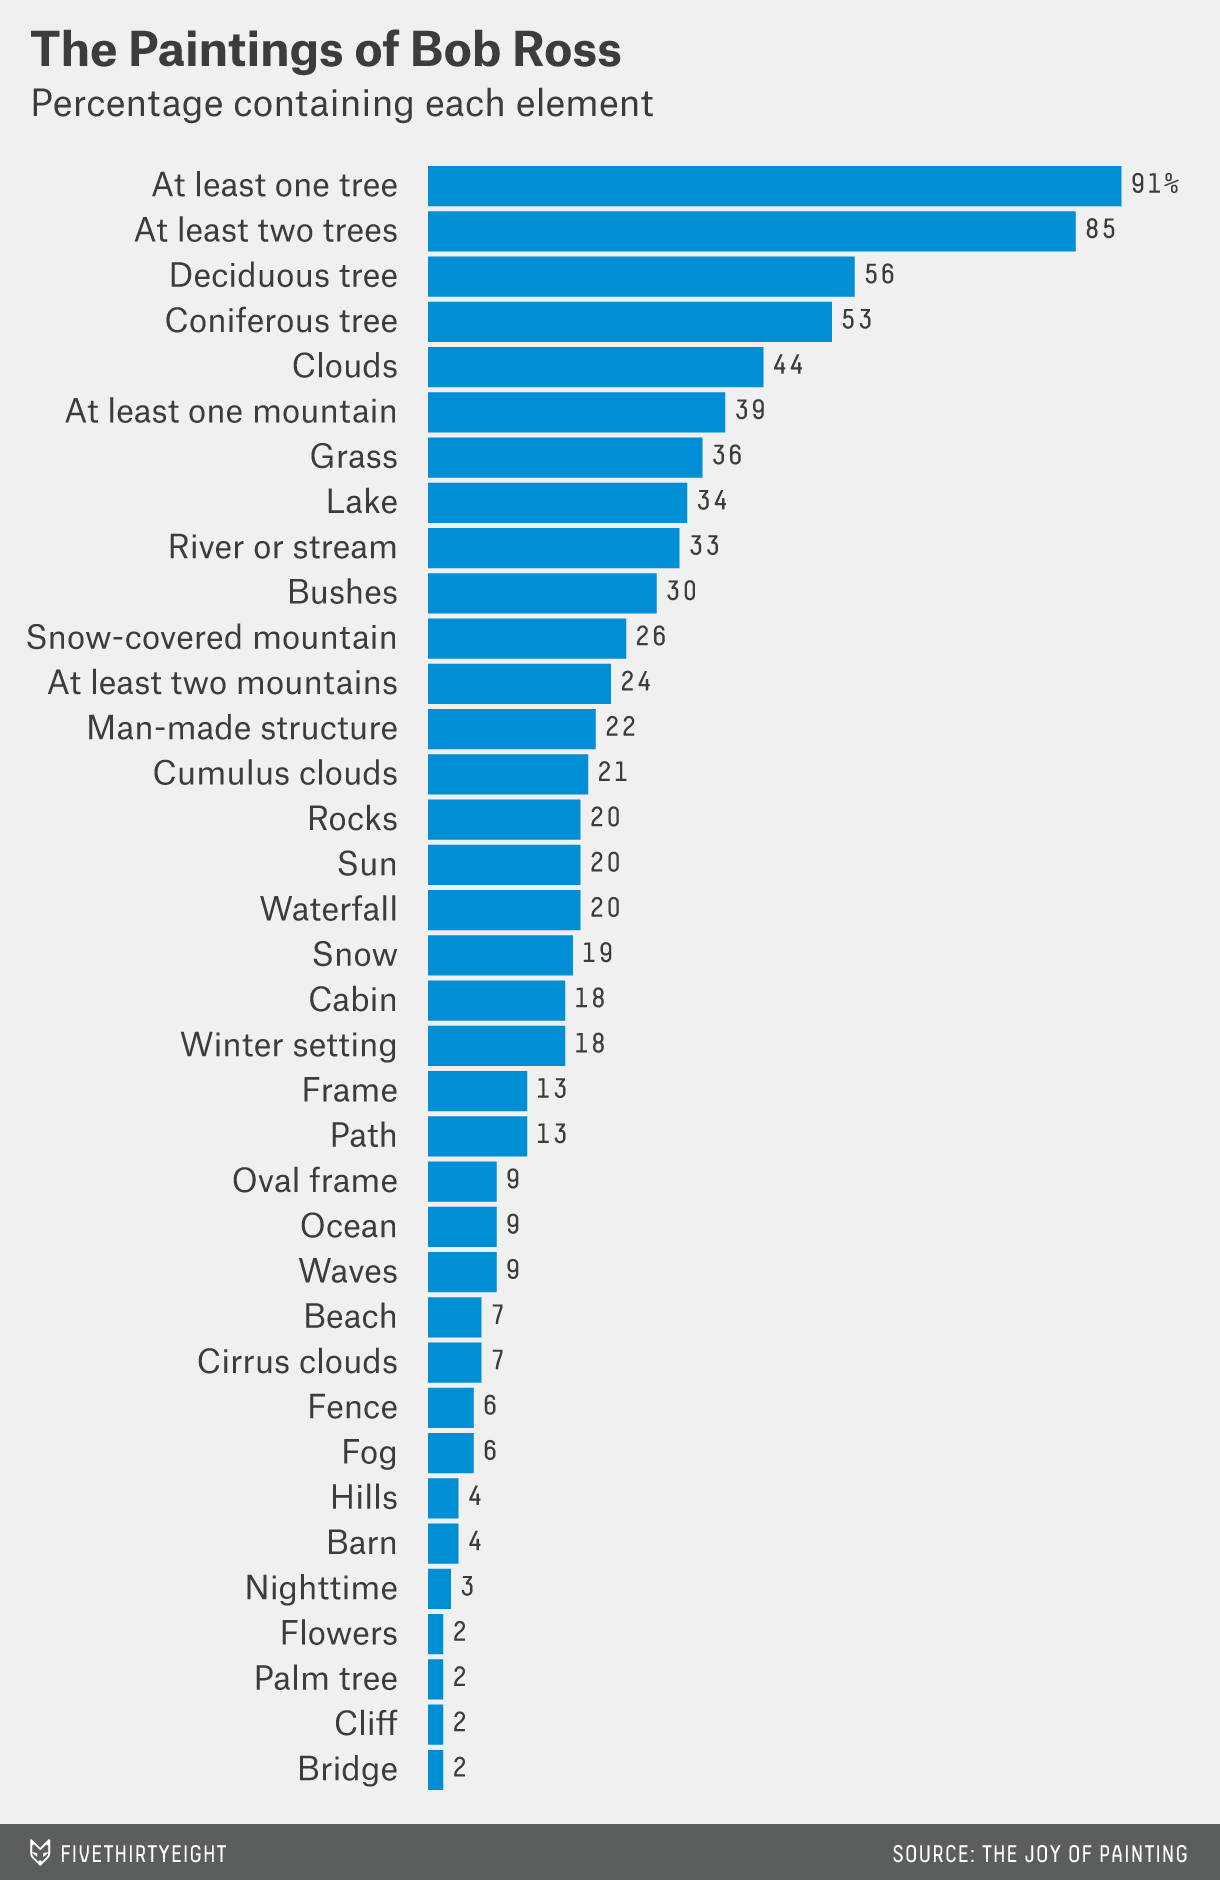

In [29]:
#  Explain why the figure below cannot be graphed as a pie chart.
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png'
example = Image(png, width=500)
display(example)

In [ ]:
# Above data represents percentage of occurence of each element in the painting and not a comparison between the elements occurence amongst each other. Hence Pie chart cannot be used. 

Task 14:

In [30]:
# Create a visualization to show the distribution of Parents/Children_Aboard.
Titanic = pd.read_csv('https://raw.githubusercontent.com/pixeltests/datasets/main/titanic.csv')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [34]:
distribution_df=Titanic['Parents/Children_Aboard'].value_counts(normalize=True)
distribution_df_pct=distribution_df*100
distribution_df_pct

0    75.986471
1    13.303269
2     9.019166
5     0.563698
3     0.563698
4     0.450958
6     0.112740
Name: Parents/Children_Aboard, dtype: float64

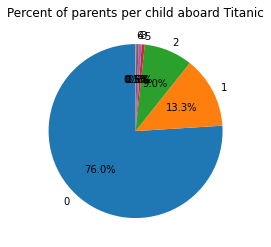

In [38]:
fig, ax = plt.subplots()

ax.pie(distribution_df_pct, labels=distribution_df_pct.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Percent of parents per child aboard Titanic')

plt.show()

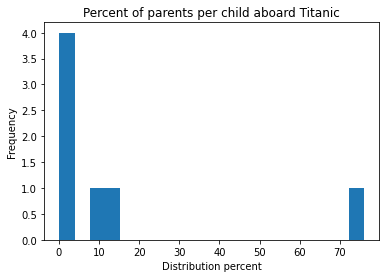

In [52]:
fig, ax = plt.subplots() 

ax.hist(distribution_df_pct, bins=20)
ax.set_xlabel('Distribution percent') 
ax.set_ylabel('Frequency') 
ax.set_title('Percent of parents per child aboard Titanic') 

plt.show()